## Problem 1

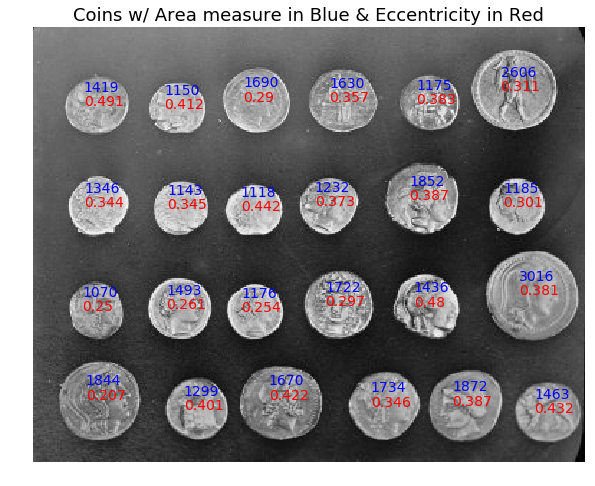

In [233]:
#Run this cell to see figure with results of the "Counting Objects" Problem

#import needed modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage.morphology import closing, opening, square, skeletonize
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage import data, exposure, img_as_float
from skimage.measure import regionprops, label
from skimage.color import label2rgb
from scipy import ndimage as ndi

# Open Image as Float 
org_image = img_as_float(data.coins())

# Normalize Image Based on Historgram of Exposure
hist_image = exposure.equalize_hist(org_image, nbins=256, mask=None)

# Apply Binary Otsu Filter
thresh = threshold_otsu(hist_image)
binary = org_image > thresh
binary = ndi.median_filter(binary, size=2) #I may have cheated a little bit here... the coin in the lower left kept trying to fragment on me, so I used this to fill it in


# Remove Features on Edges
bor_image = clear_border(binary)

## Remove Small Objects by Closing, will also fill holes
closed_image = closing(bor_image)

#Measure
image_labels = label(closed_image)
image_rgb= label2rgb(image_labels)
meas_vals = regionprops(image_labels)

#Extract Measures
eccen = []
areas = []
centroid = [] #will use the centroid points for plotting measured vals latter

for region in range(len(meas_vals)):
    if meas_vals[region].area > 10: #removes small objects
        eccen.append(meas_vals[region].eccentricity)
        areas.append(meas_vals[region].area)
        centroid.append(meas_vals[region].centroid)

centroids = np.asarray(centroid) #change type for plotting
eccen = np.around(eccen,3) #round values to fit on image


#Plot Eccentricity and Area Values on Top of Original Coins
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(org_image,cmap='gray')
for i in range(len(eccen)):
    plt.text(centroids[i,1]-10,centroids[i,0], eccen[i],color='red',fontsize='14')
    plt.text(centroids[i,1]-10,centroids[i,0]-10, areas[i],color='blue',fontsize='14')
ax.set_axis_off()
plt.title("Coins w/ Area measure in Blue & Eccentricity in Red",fontsize='18')
plt.show()

In [173]:
eccen = []
areas = []
centroid = []
for region in range(len(meas_vals)):
    if meas_vals[region].area > 10:
        eccen.append(meas_vals[region].eccentricity)
        areas.append(meas_vals[region].area)
        centroid.append(meas_vals[region].centroid)
    
    
    

In [174]:
centroid

[(43.986569455103606, 335.10360706062932),
 (51.383431952662718, 155.68047337278105),
 (51.71717791411043, 215.92147239263804),
 (54.745595489781536, 44.656095842142356),
 (53.007659574468086, 276.44851063829788),
 (56.754782608695649, 100.73391304347827),
 (119.84719222462203, 271.49838012958963),
 (124.88484398216939, 45.256315007429421),
 (124.22564935064935, 205.77191558441558),
 (125.11223628691982, 336.81181434599154),
 (126.10936132983377, 102.7182852143482),
 (127.78354203935599, 154.05456171735241),
 (186.13992042440319, 348.17606100795757),
 (193.74738675958187, 212.9082462253194),
 (194.12952646239555, 274.66991643454037),
 (196.01808439383791, 102.19423978566644),
 (197.38130841121495, 43.742056074766353),
 (198.18792517006804, 154.62585034013605),
 (259.06832971800435, 46.199023861171369),
 (259.04251497005987, 173.58323353293414),
 (263.25053418803418, 301.71527777777777),
 (263.78719723183389, 244.66955017301038),
 (266.23325635103924, 114.37875288683603),
 (268.56937799

(-0.5, 383.5, 302.5, -0.5)

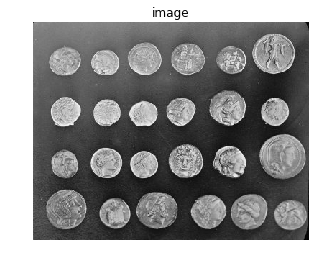

In [177]:
fig, (ax0) = plt.subplots()

ax0.imshow(org_image, cmap='gray')
ax0.set_title('image')
ax0.axis('off')



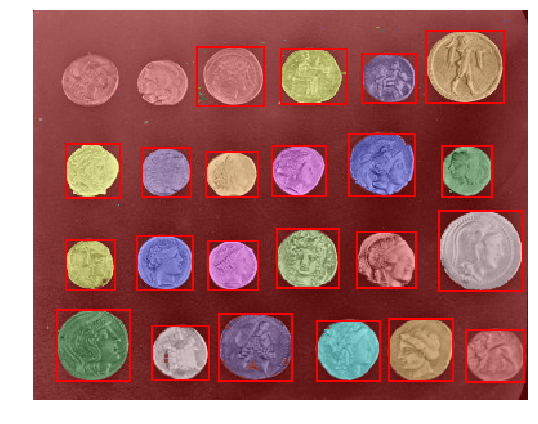

In [100]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 70:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

10
8
1936
1237
1188
1149
1123
3161
1760
1510
1493
1157
1172
2482
2282
2009
1776
1415
1533
